## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

sns.set()

## Dataset
[Dataset From Kaggle Link](https://www.kaggle.com/roshansharma/online-shoppers-intention)

[Data and Info Link](https://drive.google.com/file/d/1cWkz1FkvIXlmTUDIPipx8dIhxG1YyWt-/view?usp=sharing)

In [2]:
data = pd.read_csv('C:/github/online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
data.shape

(12330, 18)

## Data Cleanning

In [6]:
data.isnull().sum() # checking for null values

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [7]:
# droping null values
data = data.dropna()
data.shape

(12316, 18)

In [8]:
# cheaking for negative numbers in durations
neg_admin_dur = data[data['Administrative_Duration'] < 0]
neg_info_dur = data[data['Informational_Duration'] < 0]
neg_prdRe_dur = data[data['ProductRelated_Duration'] < 0]
print(" The length of each durations are {} ,{} , {} respectively".format(len(neg_admin_dur), len(neg_info_dur),len(neg_prdRe_dur)))

 The length of each durations are 33 ,33 , 33 respectively


In [9]:
# Dropping the negative  numbers in durations
data = data.drop(data[data['Administrative_Duration'] < 0].index)
data = data.drop(data[data['Informational_Duration'] < 0].index)
data = data.drop(data[data['ProductRelated_Duration'] < 0].index)

## Descriptive satistics

In [10]:
# no negative values
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,2.323862,81.126229,0.505333,34.601780,31.846536,1199.253065,0.021723,0.042611,5.911793,0.061532,2.124318,2.356997,3.147114,4.071969
std,3.325128,177.046838,1.272138,141.002498,44.521443,1915.935446,0.047686,0.047964,18.600350,0.199122,0.911718,1.717264,2.401981,4.025428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,187.100000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.500000,0.003077,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.950000,0.000000,0.000000,38.000000,1470.909852,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Exploratary Data Analysis EDA
#### Countplots to count the number of customers in various features

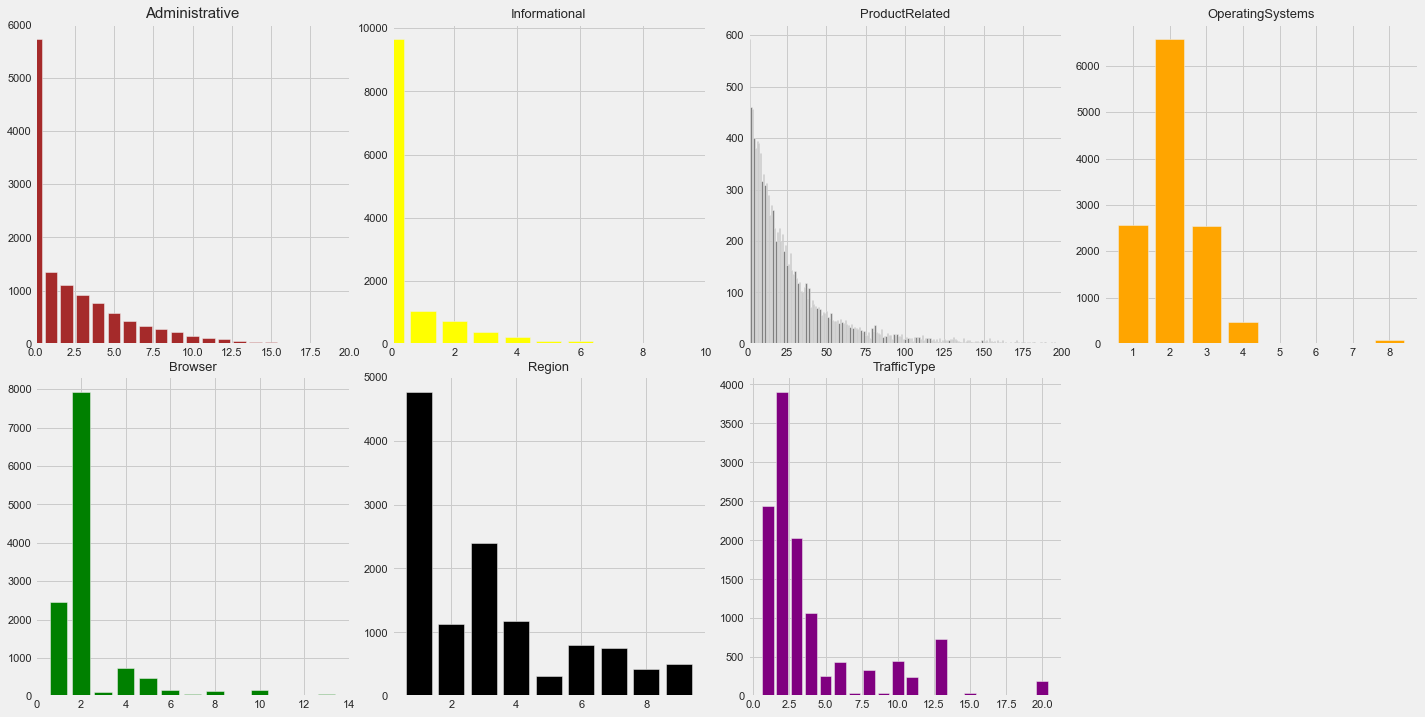

In [11]:
# Plotting Countplots  
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(nrows = 2, ncols = 4,figsize = (20,10))
fig.tight_layout()

#fig.suptitle('Countplots for Some Features')   
ax[0,0].bar(data['Administrative'].value_counts().index,data['Administrative'].value_counts().values,color = 'brown')
ax[0,0].set_title('Administrative',size=15)
ax[0,0].set_xlim(0,20)

ax[0,1].bar(data['Informational'].value_counts().index,data['Informational'].value_counts().values,color = 'yellow')
ax[0,1].set_title('Informational',size=13)
ax[0,1].set_xlim(0,10)

ax[0,2].bar(data['ProductRelated'].value_counts().index,data['ProductRelated'].value_counts().values,color = 'gray')
ax[0,2].set_title('ProductRelated',size=13)
ax[0,2].set_xlim(0,200)

ax[0,3].bar(data['OperatingSystems'].value_counts().index,data['OperatingSystems'].value_counts().values,color = 'orange')
ax[0,3].set_title('OperatingSystems',size=13)

ax[1,0].bar(data['Browser'].value_counts().index,data['Browser'].value_counts().values,color = 'green')
ax[1,0].set_title('Browser',size=13)

ax[1,1].bar(data['Region'].value_counts().index,data['Region'].value_counts().values,color = 'black')
ax[1,1].set_title('Region',size=13)


ax[1,2].bar(data['TrafficType'].value_counts().index,data['TrafficType'].value_counts().values,color = 'purple')
ax[1,2].set_title('TrafficType',size=13)

fig.delaxes(ax[1,3])   # since it is a odd number plots, delete last subplot

## Pie charts to show the quantity ratios of categorical columns

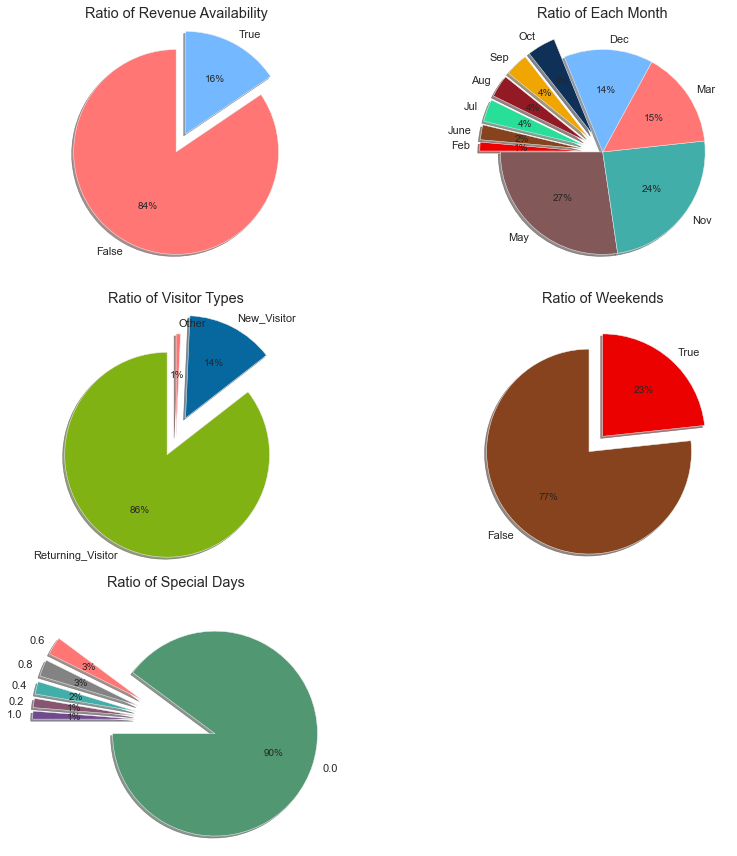

In [12]:
# plotting the categorical features with pie chart
plt.style.use('ggplot')
fig,ax = plt.subplots(3,2,figsize=(10,6))
fig.set_figheight(12)
fig.set_figwidth(12)
custom_colours1 = ['#ff7675', '#74b9ff']
custom_colours2 = ['#835858','#41aea9','#ff7675', '#74b9ff','#0f3057','#f0a500','#931a25','#28df99','#87431d','#ec0101']
custom_colours3 = ['#81b214','#07689f','#ff7675']
custom_colours4 = ['#87431d','#ec0101']
custom_colours5 = ['#519872','#ff7675','#838383','#41aea9','#87556f','#6f4a8e']
plt.tight_layout()


# Revenue
ax[0,0].pie(data['Revenue'].value_counts().values,labels = ['False','True'],shadow = True,
            startangle = 90, explode = [0, 0.2],autopct='%1.0f%%', colors = custom_colours1)
ax[0,0].set_title('Ratio of Revenue Availability')


# Month() No Jan and April
ax[0,1].pie(data['Month'].value_counts().values,labels= data['Month'].value_counts().index[:],shadow = True,
            startangle = 180, explode = [0, 0,0,0,0.2,0.2,0.2,0.2,0.2,0.2], autopct='%1.0f%%', colors = custom_colours2)
ax[0,1].set_title('Ratio of Each Month')

# Visitor Types
ax[1,0].pie(data['VisitorType'].value_counts().values,labels= data['VisitorType'].value_counts().index[:],shadow = True,
            startangle = 90, explode = [0.2, 0.2,0], autopct='%1.0f%%', colors = custom_colours3)
ax[1,0].set_title('Ratio of Visitor Types')

# Weekend
ax[1,1].pie(data['Weekend'].value_counts().values,labels= data['Weekend'].value_counts().index[:],shadow = True,
            startangle = 90, explode = [0.2,0], autopct='%1.0f%%', colors = custom_colours4)
ax[1,1].set_title('Ratio of Weekends')

# Special Days
ax[2,0].pie(data['SpecialDay'].value_counts().values,labels= data['SpecialDay'].value_counts().index[:],shadow = True,
            startangle = 180, explode = [0.4,0.4,0.4,0.4,0.4,0.4], autopct='%1.0f%%', colors = custom_colours5)
ax[2,0].set_title('Ratio of Special Days')

fig.delaxes(ax[2,1])

## Bar charts to show the ratio between False Revenue and True Revenue of some numerical and categorical columns

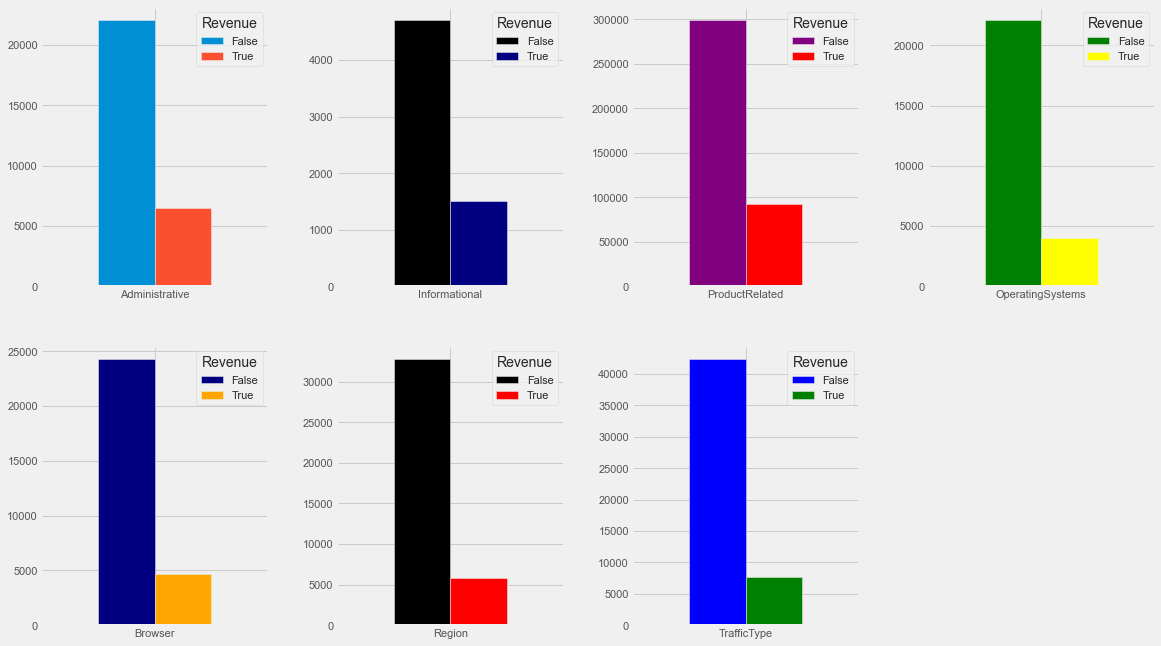

In [13]:
# Lets see the Ratio of Revenue in each types
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(nrows = 2, ncols = 4,figsize = (17,10))
fig.tight_layout(pad = 3)


admin_rev = data[['Administrative','Revenue']]
rev_p1 = pd.DataFrame(data.groupby('Revenue')['Administrative'].sum()).T
rev_p1.plot.bar(ax=ax[0,0])
ax[0,0].set_xticklabels(['Administrative'], rotation=360)



info_rev = data[['Informational','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['Informational'].sum()).T
rev_p2.plot.bar(ax = ax[0,1],color = ['black','navy'])
ax[0,1].set_xticklabels(['Informational'], rotation=360)


info_rev = data[['ProductRelated','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['ProductRelated'].sum()).T
rev_p2.plot.bar(ax = ax[0,2],color = ['purple','red'])
ax[0,2].set_xticklabels(['ProductRelated'], rotation=360)




info_rev = data[['OperatingSystems','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['OperatingSystems'].sum()).T
rev_p2.plot.bar(ax = ax[0,3],color = ['green','yellow'])
ax[0,3].set_xticklabels(['OperatingSystems'], rotation=360)


info_rev = data[['Browser','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['Browser'].sum()).T
rev_p2.plot.bar(ax = ax[1,0],color = ['navy','orange'])
ax[1,0].set_xticklabels(['Browser'], rotation=360)


info_rev = data[['Region','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['Region'].sum()).T
rev_p2.plot.bar(ax = ax[1,1],color = ['black','red'])
ax[1,1].set_xticklabels(['Region'], rotation=360)


info_rev = data[['TrafficType','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['TrafficType'].sum()).T
rev_p2.plot.bar(ax = ax[1,2],color = ['blue','green'])
ax[1,2].set_xticklabels(['TrafficType'], rotation=360)

fig.delaxes(ax[1,3])

## Countplots to depict the ratio between False Revenue and True Revenue of some categorical columns

Text(0.5, 1.0, 'Ratio of Revenue Of Each Special Days')

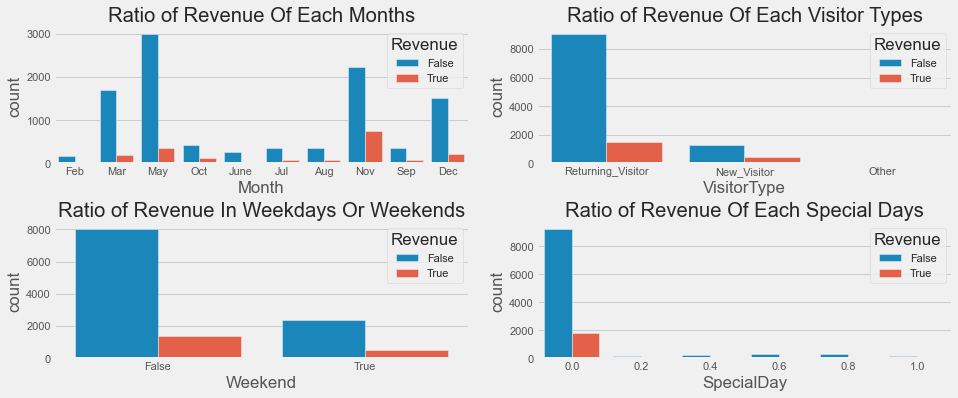

In [14]:
# Lets see the Ratio of Revenue in each categorical features
fig, ax = plt.subplots(2,2,figsize = (14,6))
plt.tight_layout(pad= 3)

month_rev = data[['Month','Revenue']]
vis_rev = data[['VisitorType','Revenue']]
weekends_rev = data[['Weekend','Revenue']]
spd_rev = data[['SpecialDay','Revenue']]

sns.countplot(x = month_rev['Month'],hue = month_rev['Revenue'],ax =ax[0,0]).set_title('Ratio of Revenue Of Each Months')
sns.countplot(x = vis_rev['VisitorType'],hue = vis_rev['Revenue'],ax =ax[0,1]).set_title('Ratio of Revenue Of Each Visitor Types')
sns.countplot(x = weekends_rev['Weekend'],hue = weekends_rev['Revenue'],ax =ax[1,0]).set_title('Ratio of Revenue In Weekdays Or Weekends')
sns.countplot(x = spd_rev['SpecialDay'],hue = spd_rev['Revenue'],ax =ax[1,1]).set_title('Ratio of Revenue Of Each Special Days')

##  Distributions of ExitRates,BounceRates and PageValues between False/True Revenue

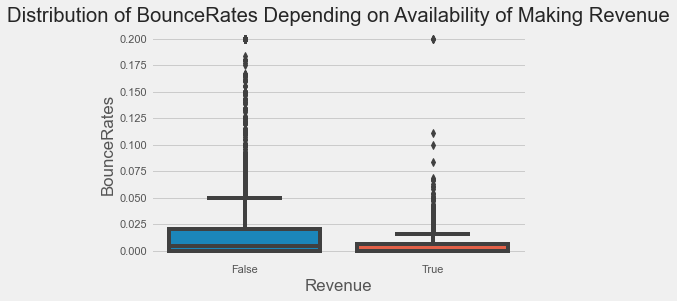

In [15]:
# lETS SEE SOME DATA RELATED TO THE BOUNCE AND EXIT RATE
sns.boxplot(x=data['Revenue'],y=data['BounceRates'])
plt.title('Distribution of BounceRates Depending on Availability of Making Revenue')
plt.show()

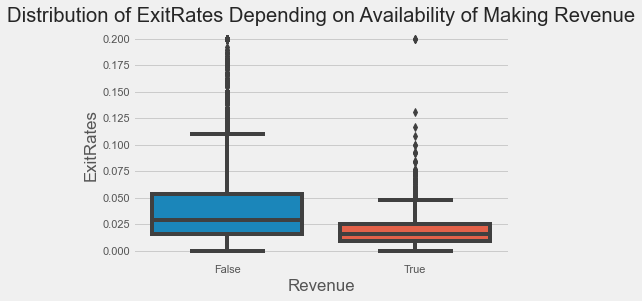

In [16]:
sns.boxplot(x=data['Revenue'],y=data['ExitRates'])
plt.title('Distribution of ExitRates Depending on Availability of Making Revenue')
plt.show()

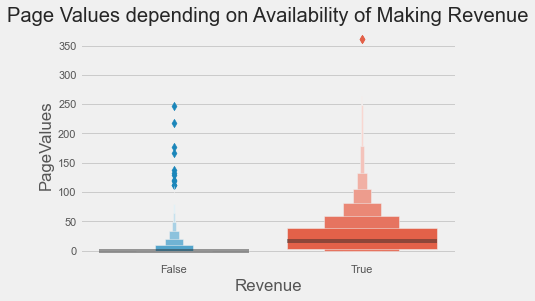

In [17]:
sns.boxenplot(x=data['Revenue'],y=data['PageValues'])
plt.title('Page Values depending on Availability of Making Revenue')
plt.show()

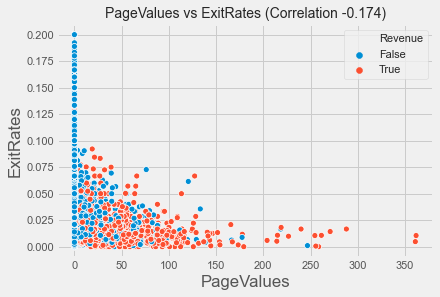

In [18]:
# Page Values Vs ExitRates
Pag_Exi_corr = round(data['PageValues'].corr(data['ExitRates']), 3)
sns.scatterplot(x= data['PageValues'],y=data['ExitRates'],hue = data['Revenue'])
plt.title(f'PageValues vs ExitRates (Correlation {Pag_Exi_corr})', fontsize=14)
plt.show()

studying the above graph, as the PageValues increases, the ExitRates decreases. 

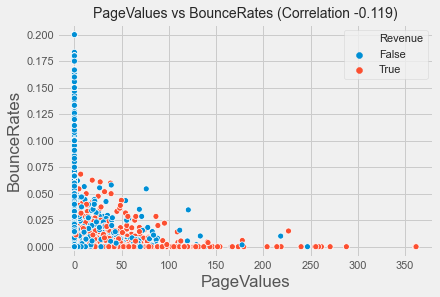

In [19]:
# Exit/Bounce Rates VS Page Values
Pag_Bou_corr = round(data['PageValues'].corr(data['BounceRates']), 3)
sns.scatterplot(x= data['PageValues'],y=data['BounceRates'],hue = data['Revenue'])
plt.title(f'PageValues vs BounceRates (Correlation {Pag_Bou_corr})', fontsize=14)
plt.show()

from the above graph, As the PageValues increase, the customers are more likely to make a transactions, which in turn leads to lower Bounce/Exit Rates

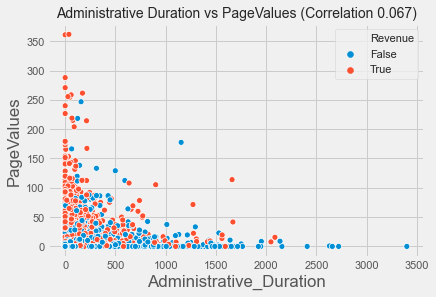

In [20]:
# Administrative Duration VS Page Values
Admin_Pag_corr = round(data['Administrative_Duration'].corr(data['PageValues']), 3)
sns.scatterplot(x= data['Administrative_Duration'],y=data['PageValues'],hue = data['Revenue'])
plt.title(f'Administrative Duration vs PageValues (Correlation {Admin_Pag_corr})', fontsize=14)
plt.show()

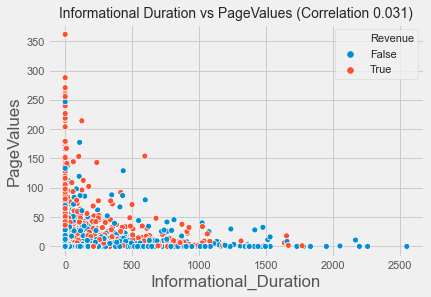

In [21]:
# Information Duration VS Page Values
Info_Pag_corr = round(data['Informational_Duration'].corr(data['PageValues']), 3)
sns.scatterplot(x= data['Informational_Duration'],y=data['PageValues'],hue = data['Revenue'])
plt.title(f'Informational Duration vs PageValues (Correlation {Info_Pag_corr})', fontsize=14)
plt.show()

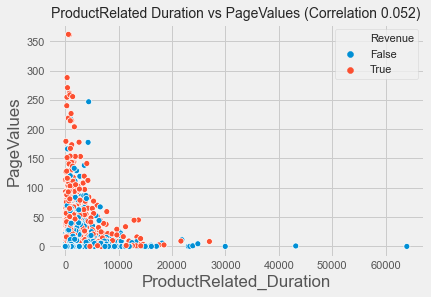

In [22]:
# ProductRelated Duration VS Page Values
Prod_Pag_corr = round(data['ProductRelated_Duration'].corr(data['PageValues']), 3)
sns.scatterplot(x= data['ProductRelated_Duration'],y=data['PageValues'],hue = data['Revenue'])
plt.title(f'ProductRelated Duration vs PageValues (Correlation {Prod_Pag_corr})', fontsize=14)
plt.show()

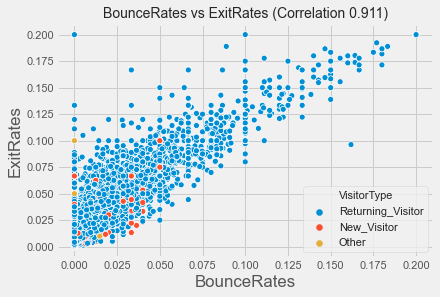

In [23]:
# BounceRates Vs ExitRate
Bou_Exi_corr = round(data['BounceRates'].corr(data['ExitRates']), 3)
sns.scatterplot(data['BounceRates'],data['ExitRates'],hue = data['VisitorType'],)
plt.title(f'BounceRates vs ExitRates (Correlation {Bou_Exi_corr})', fontsize=14)
plt.show()

As the BounceRates increases, the ExitRates increases because the customers are more likely to exit the page

## Analysis of Administrative,Informational and ProductRelated Duration

Text(0.5, 1.0, 'Each Types of Durations Distribution')

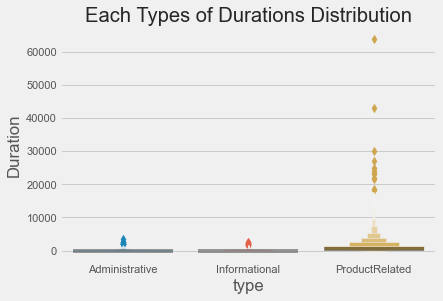

In [24]:
# Durations
admin_df = pd.DataFrame(data['Administrative_Duration'])
admin_df.rename(columns={'Administrative_Duration' :'Duration'},inplace = True)
admin_df['type'] = admin_df['Duration'].apply(lambda x:'Administrative')

inform_df= pd.DataFrame(data['Informational_Duration'])
inform_df.rename(columns={'Informational_Duration' :'Duration'},inplace =True)
inform_df['type'] = inform_df['Duration'].apply(lambda x:'Informational')

prod_df= pd.DataFrame(data['ProductRelated_Duration'])
prod_df.rename(columns={'ProductRelated_Duration' :'Duration'},inplace =True)
prod_df['type'] = prod_df['Duration'].apply(lambda x:'ProductRelated')



dur_df = pd.concat([admin_df,inform_df,prod_df])
sns.boxenplot(dur_df['type'], dur_df['Duration']).set_title('Each Types of Durations Distribution')

Text(0.5, 1.0, 'Administrative and Informational Durations Distribution')

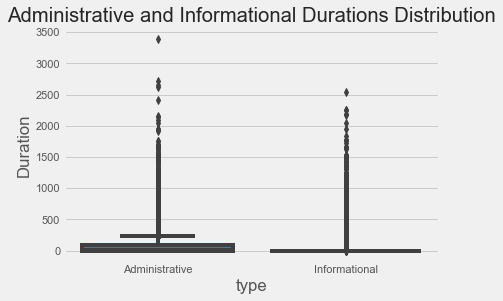

In [25]:
# Wow, the gap is too big, so lets see them 
dur_df12 = pd.concat([admin_df,inform_df])
sns.boxplot(dur_df12['type'],dur_df12['Duration']).set_title('Administrative and Informational Durations Distribution')

In [26]:
pd.DataFrame(data['Administrative_Duration'].describe())

,Administrative_Duration
count,12283.000000
mean,81.126229
std,177.046838
min,0.000000
25%,0.000000
50%,8.000000
75%,93.950000
max,3398.750000


In [27]:
pd.DataFrame(data['Informational_Duration'].describe())

,Informational_Duration
count,12283.000000
mean,34.601780
std,141.002498
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2549.375000


In [28]:
# outliers of each columns:
# Administrative :  High : 93.95 + 93.95 (IQR)
#                   Low  : 0- 93.95
# Outliers of Administrative is larger than 187.9 and lower than - 93.95
ad_zero = data[data['Administrative_Duration'] == 0]
outlier_len = len(data[data['Administrative_Duration'] > 187.9]) 
outlier_prt = outlier_len / len(data['Administrative_Duration']) *100    # 12%
print("The % of Outliers of Administrative Duration Columns are ",round(outlier_prt, 1))
ad_zero_prt = len(ad_zero)/len(data['Administrative_Duration']) *100     # 47%
print("The % of 0 Values of Administrative Duration Columns are ",round(ad_zero_prt, 1))

# Informational :  High : 0
#                   Low  : 0
# Outliers of Administrative is larger than 187.9 and lower than - 93.95
info_zero = data[data['Informational_Duration'] == 0]
outlier_len2 = len(data[data['Informational_Duration'] > 0]) 
outlier_prt2 = outlier_len2 / len(data['Informational_Duration']) *100    
print("The % of Outliers of Informational Duration Column is ",round(outlier_prt2, 1))
info_zero_prt = len(info_zero)/len(data['Informational_Duration']) *100     
print("The % of 0 Values of Informational Duration Column is ",round(info_zero_prt, 1))

The % of Outliers of Administrative Duration Columns are  12.7
The % of 0 Values of Administrative Duration Columns are  47.7
The % of Outliers of Informational Duration Column is  19.6
The % of 0 Values of Informational Duration Column is  80.4


In [29]:
prddur_rev = data.groupby('Revenue')['ProductRelated_Duration'].mean()
prddur_rev = pd.DataFrame(prddur_rev)
prddur_rev

,ProductRelated_Duration
Revenue,
False,1074.758308
True,1876.209615


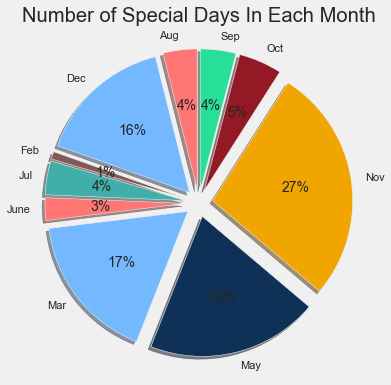

In [30]:
# Which Month will have the most transactions near the SpecialDays ( equalls to 0 if close to the special days)?
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
colour = ['#ff7675', '#74b9ff','#835858','#41aea9','#ff7675', '#74b9ff','#0f3057','#f0a500','#931a25','#28df99']


SpecialDays_0 = data[data['SpecialDay'] == 0]
data_month = SpecialDays_0.groupby('Month')['SpecialDay'].count()
plt.figure(figsize=(10,6))
plt.title('Number of Special Days In Each Month')
plt.pie(data_month.values,labels = data_month.index,shadow =True,explode=explode,colors=colour,autopct='%1.0f%%',startangle = 90)
plt.show()

## Distribution of ExitRates,BounceRates, Each of Durations and PageValues of the Categorical Columns

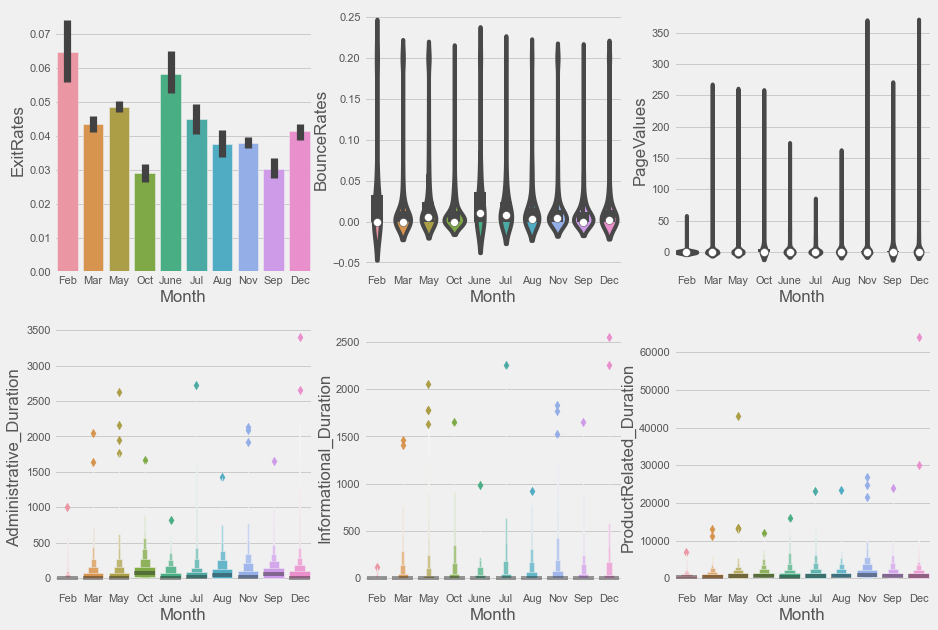

In [31]:
fig, axes = plt.subplots(2,3,figsize = (14,10))

sns.barplot(data['Month'],data['ExitRates'],ax = axes[0,0])
sns.violinplot(data['Month'],data['BounceRates'],ax = axes[0,1])
sns.violinplot(data['Month'],data['PageValues'],ax = axes[0,2])
sns.boxenplot(data['Month'],data['Administrative_Duration'],ax = axes[1,0])
sns.boxenplot(data['Month'],data['Informational_Duration'],ax = axes[1,1])
sns.boxenplot(data['Month'],data['ProductRelated_Duration'],ax = axes[1,2])

## Distribution of ExitRates,BounceRates and PageValues of various categorical features

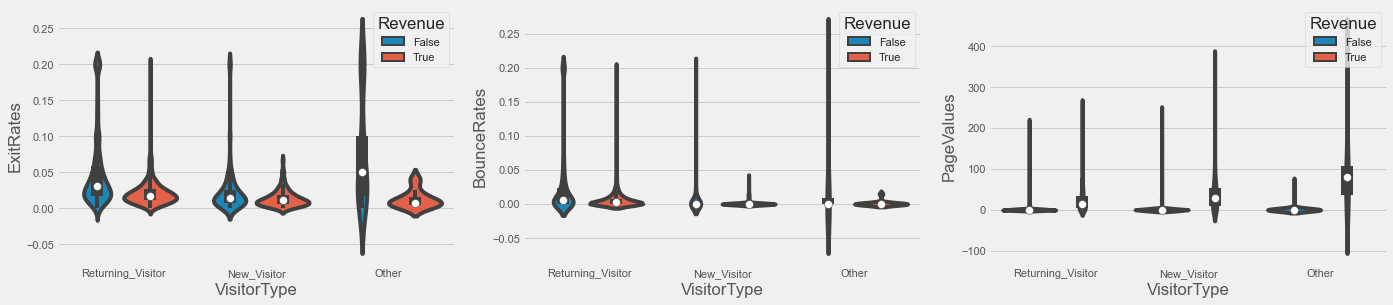

In [32]:
# Customer Types
fig , ax = plt.subplots(1,3,figsize = (20,5))
ax.flatten()
plt.tight_layout(pad =3)


sns.violinplot(data['VisitorType'],data['ExitRates'],ax = ax[0],hue = data['Revenue'])

sns.violinplot(data['VisitorType'],data['BounceRates'],ax = ax[1],hue = data['Revenue'])

sns.violinplot(data['VisitorType'],data['PageValues'],ax = ax[2],hue = data['Revenue'])

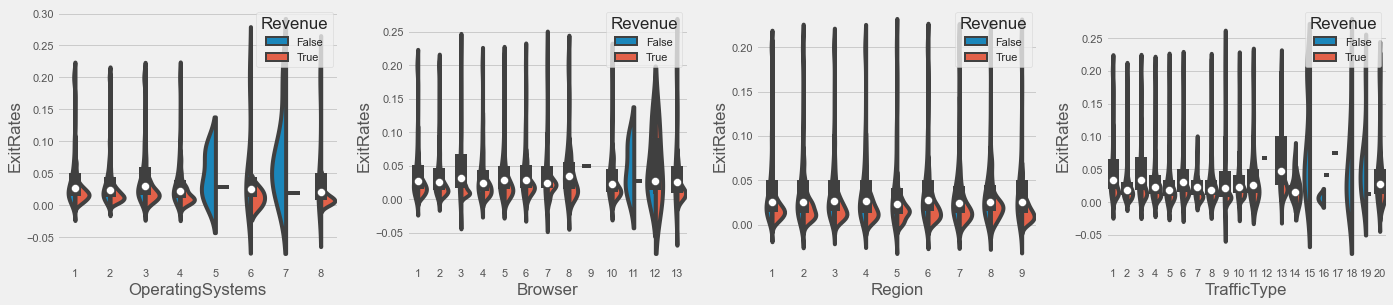

In [33]:
fig , ax = plt.subplots(1,4,figsize = (20,5))
ax.flatten()
plt.tight_layout(pad =3)

sns.violinplot(data['OperatingSystems'],data['ExitRates'],ax = ax[0],split=True,hue = data['Revenue'])
sns.violinplot(data['Browser'],data['ExitRates'],ax = ax[1],split=True,hue = data['Revenue'])
sns.violinplot(data['Region'],data['ExitRates'],ax = ax[2],split=True,hue = data['Revenue'])
sns.violinplot(data['TrafficType'],data['ExitRates'],ax = ax[3],split=True,hue = data['Revenue'])

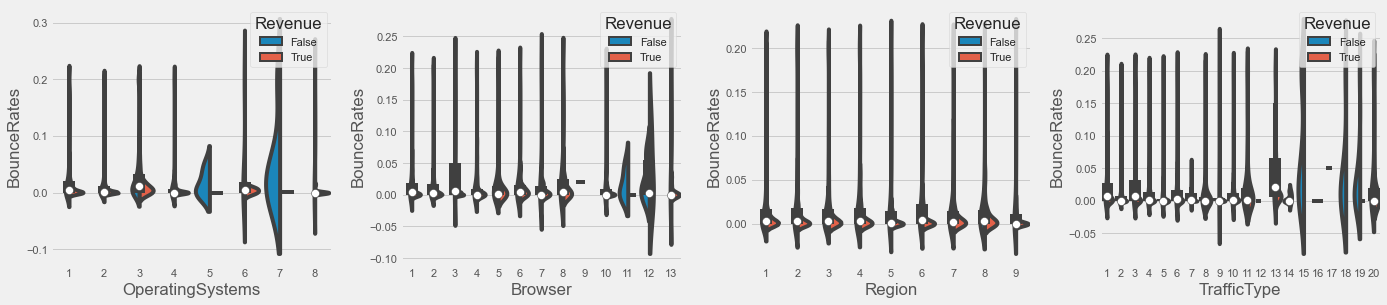

In [34]:
fig , ax = plt.subplots(1,4,figsize = (20,5))
ax.flatten()
plt.tight_layout(pad =3)

sns.violinplot(data['OperatingSystems'],data['BounceRates'],ax = ax[0],split=True,hue = data['Revenue'])
sns.violinplot(data['Browser'],data['BounceRates'],ax = ax[1],split=True,hue = data['Revenue'])
sns.violinplot(data['Region'],data['BounceRates'],ax = ax[2],split=True,hue = data['Revenue'])
sns.violinplot(data['TrafficType'],data['BounceRates'],ax = ax[3],split=True,hue = data['Revenue'])

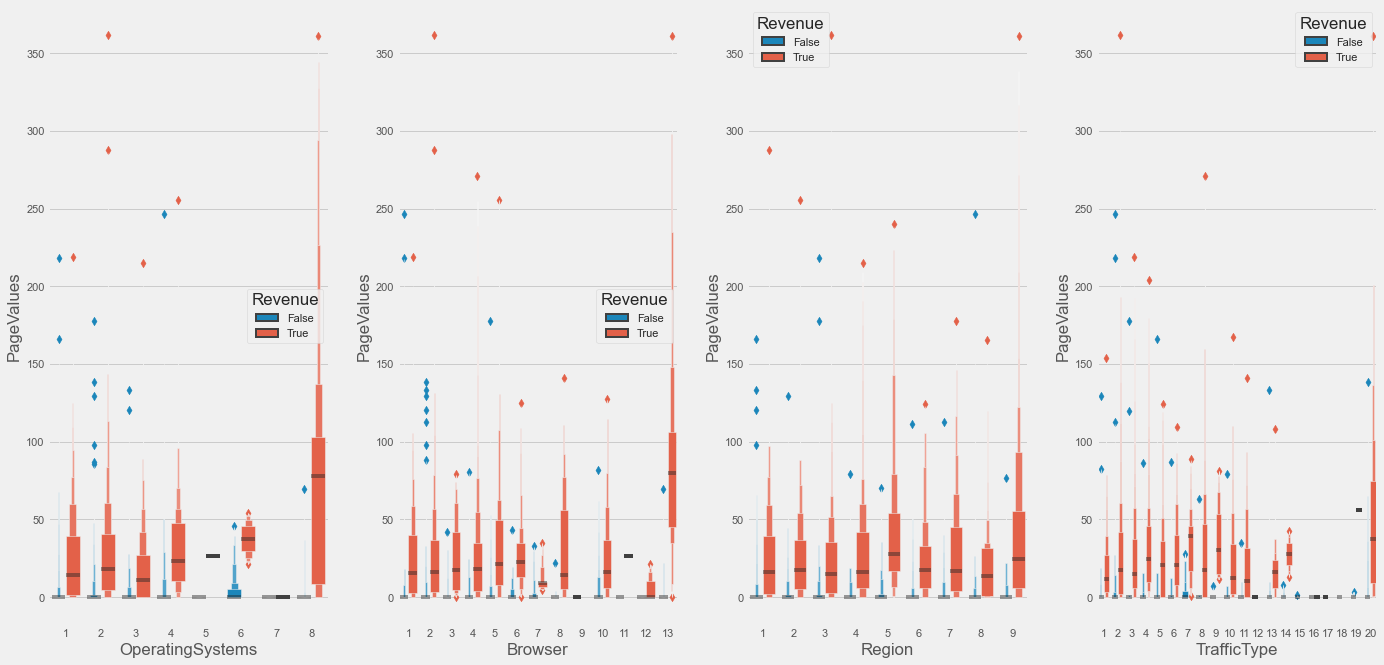

In [35]:
fig , ax = plt.subplots(1,4,figsize = (20,10))
ax.flatten()
plt.tight_layout(pad =3)

sns.boxenplot(data['OperatingSystems'],data['PageValues'],ax = ax[0],hue = data['Revenue'])
sns.boxenplot(data['Browser'],data['PageValues'],ax = ax[1],hue = data['Revenue'])
sns.boxenplot(data['Region'],data['PageValues'],ax = ax[2],hue = data['Revenue'])
sns.boxenplot(data['TrafficType'],data['PageValues'],ax = ax[3],hue = data['Revenue'])

## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [36]:
data.corr() # Pearson Correlation Coefficients

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601171,0.376374,0.255479,0.430116,0.372935,-0.221188,-0.314919,0.098267,-0.095300,-0.006594,-0.025055,-0.005385,-0.034072,0.025780,0.137970
Administrative_Duration,0.601171,1.000000,0.302304,0.237734,0.288277,0.354749,-0.142435,-0.204583,0.067096,-0.073636,-0.007523,-0.015399,-0.005517,-0.014680,0.014586,0.092911
Informational,0.376374,0.302304,1.000000,0.618880,0.373680,0.387065,-0.114485,-0.162471,0.048217,-0.048448,-0.009522,-0.038197,-0.029341,-0.034704,0.035234,0.094672
Informational_Duration,0.255479,0.237734,0.618880,1.000000,0.279701,0.347088,-0.073064,-0.104530,0.030579,-0.030731,-0.009656,-0.019296,-0.027190,-0.024855,0.023847,0.069984
ProductRelated,0.430116,0.288277,0.373680,0.279701,1.000000,0.860711,-0.201828,-0.290579,0.055521,-0.024348,0.004071,-0.013122,-0.038137,-0.043569,0.015496,0.157624
ProductRelated_Duration,0.372935,0.354749,0.387065,0.347088,0.860711,1.000000,-0.181990,-0.249958,0.052124,-0.036757,0.002773,-0.007352,-0.033093,-0.036831,0.006739,0.151528
BounceRates,-0.221188,-0.142435,-0.114485,-0.073064,-0.201828,-0.181990,1.000000,0.911252,-0.118532,0.074726,0.025334,-0.017798,-0.008184,0.081602,-0.044896,-0.149348
ExitRates,-0.314919,-0.204583,-0.162471,-0.104530,-0.290579,-0.249958,0.911252,1.000000,-0.174110,0.104718,0.015734,-0.005722,-0.010122,0.081245,-0.061203,-0.206145
PageValues,0.098267,0.067096,0.048217,0.030579,0.055521,0.052124,-0.118532,-0.174110,1.000000,-0.063777,0.018430,0.045707,0.011370,0.012369,0.011718,0.492317
SpecialDay,-0.095300,-0.073636,-0.048448,-0.030731,-0.024348,-0.036757,0.074726,0.104718,-0.063777,1.000000,0.012127,0.003472,-0.015864,0.052496,-0.016738,-0.082632


In [37]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

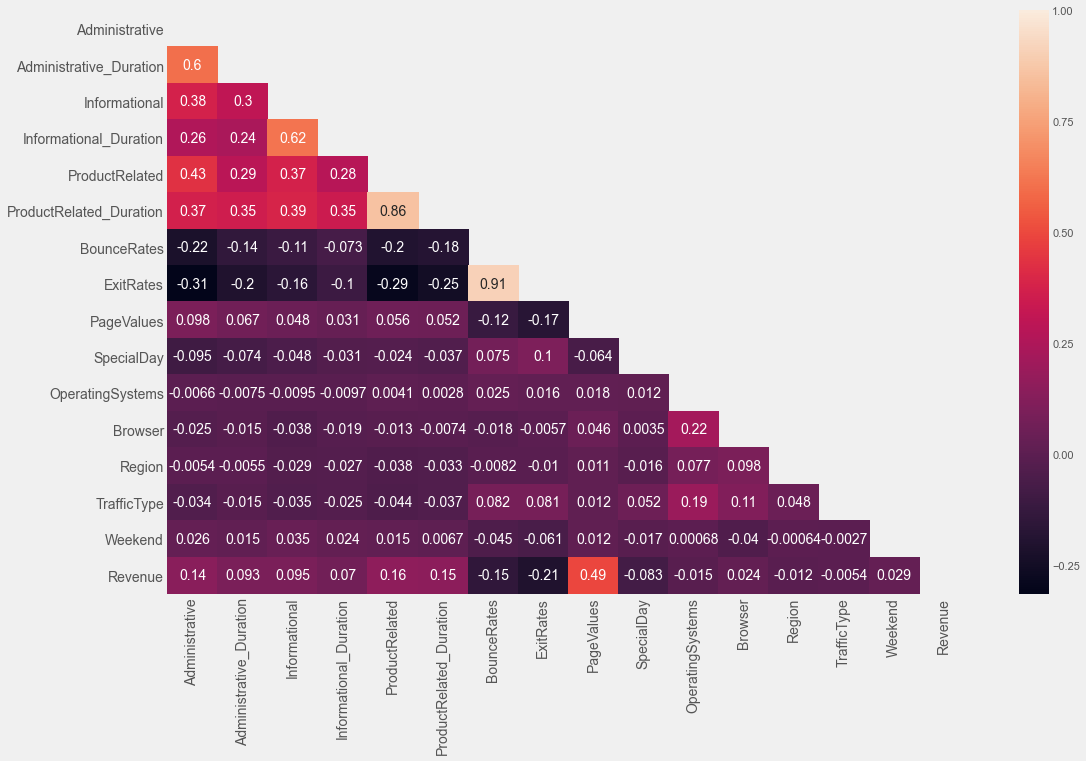

In [38]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Clustering Model

### Cluster Administrative Duration

In [39]:
# Cluster Administrative Duration
X = data[['Administrative_Duration','BounceRates']]

In [40]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

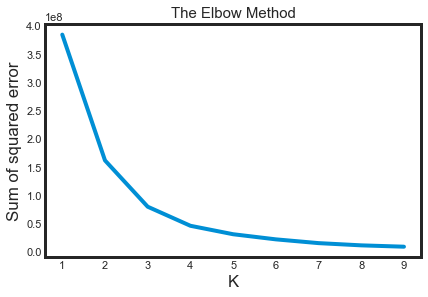

In [41]:
# The Elbow Method
plt.xlabel('No. of Clusters')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method',fontsize=15)
plt.plot(k_rng,sse)


In [42]:
# 3 Cluseters
kms = KMeans(n_clusters=3,max_iter = 100 , n_init = 10,random_state=100).fit(X)
pred = kms.fit_predict(X)

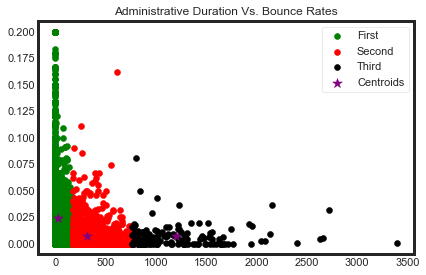

In [43]:
#Clustering
plt.scatter(X.iloc[pred == 0,0],X.iloc[pred == 0,1],label='First',color ='green')
plt.scatter(X.iloc[pred == 1,0],X.iloc[pred == 1,1],label ='Second',color='red')
plt.scatter(X.iloc[pred == 2,0],X.iloc[pred == 2,1],label='Third',color='black')
plt.title('Administrative Duration Vs. Bounce Rates', fontsize = 12)
centers = kms.cluster_centers_
plt.scatter(centers[:, 0],centers[:,1],s=100,color='purple',marker='*',label='Centroids')

plt.legend()

In [44]:
# First cluster
print(data[pred == 0]['Revenue'].value_counts())
print("The Percentage of first cluster groups who made a transactions is :",round(1493/9063*100, 1),"%")

False    9063
True     1493
Name: Revenue, dtype: int64
The Percentage of first cluster groups who made a transactions is : 16.5 %


In [45]:
# Second cluster
print(data[pred == 1]['Revenue'].value_counts())
print("The Percentage of second cluster groups who made a transactions is :",round(382/1192*100, 1),"%")

False    1192
True      382
Name: Revenue, dtype: int64
The Percentage of second cluster groups who made a transactions is : 32.0 %


In [46]:
# Third cluster
print(data[pred == 2]['Revenue'].value_counts())
print("The Percentage of third cluster groups who made a transactions is :",round(33/120*100, 1),"%")

False    120
True      33
Name: Revenue, dtype: int64
The Percentage of third cluster groups who made a transactions is : 27.5 %


In administrative duration, the second group( Middle values of BounceRates and Administrative Duration) has slightly more customers with True Revenue

By, Looking at this Clustering plot, we can say confindently say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.

There are Three Groups, The Green Group is a group of customers who stay for shortest adminstrative duration and have highest chance for Navigating away

### Clustering Informational Duration

In [47]:
# Clustering Informational Duration
Y = data[['Informational_Duration','BounceRates']]

In [48]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Y)
    sse.append(km.inertia_)

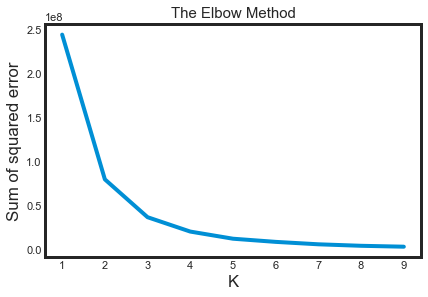

In [49]:
# The Elbow Method
plt.xlabel('No. of Clusters')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method',fontsize=15)
plt.plot(k_rng,sse)

In [50]:
# 3 Cluseters
kms = KMeans(n_clusters=3,max_iter = 100 , n_init = 10,random_state=100).fit(X)
pred_y = kms.fit_predict(Y)

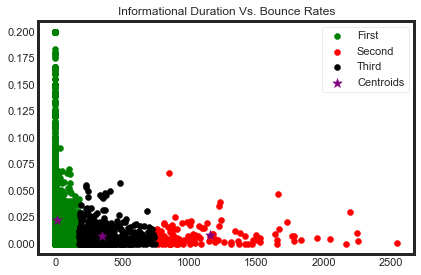

In [51]:
#Clustering
plt.scatter(Y.iloc[pred_y == 0,0],Y.iloc[pred_y == 0,1],label='First',color ='green')
plt.scatter(Y.iloc[pred_y == 1,0],Y.iloc[pred_y == 1,1],label ='Second',color='red')
plt.scatter(Y.iloc[pred_y == 2,0],Y.iloc[pred_y == 2,1],label='Third',color='black')
plt.title('Informational Duration Vs. Bounce Rates', fontsize = 12)
centers = kms.cluster_centers_
plt.scatter(centers[:, 0],centers[:,1],s=100,color='purple',marker='*',label='Centroids')

plt.legend()

In [52]:
#first cluster
print(data[pred_y == 0]['Revenue'].value_counts())
print("The Percentage of first cluster groups who made a transactions is :",round(1719/9896*100, 1),"%")

False    9896
True     1719
Name: Revenue, dtype: int64
The Percentage of first cluster groups who made a transactions is : 17.4 %


In [53]:
# second cluster
print(data[pred_y == 1]['Revenue'].value_counts())
print("The Percentage of second cluster groups who made a transactions is :",round(31/85*100, 1),"%")

False    85
True     31
Name: Revenue, dtype: int64
The Percentage of second cluster groups who made a transactions is : 36.5 %


In [54]:
# third cluster
print(data[pred_y == 2]['Revenue'].value_counts())
print ("The Percentage of third cluster groups who made a transactions is :",round(158/394*100, 1),"%")

False    394
True     158
Name: Revenue, dtype: int64
The Percentage of third cluster groups who made a transactions is : 40.1 %


In Informational Duration, the third group ( Middle values of BounceRates and Informational Duration) has slightly more customers with true Revenue.

### Clustering ProductRelated Duration

In [55]:
# clustering ProductRelated Duration
Z = data[['ProductRelated_Duration','BounceRates']]

In [56]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Z)
    sse.append(km.inertia_)

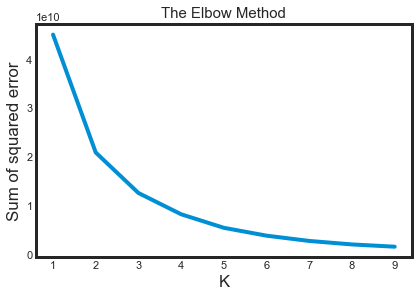

In [57]:
# The Elbow Method
plt.xlabel('No. of Clusters')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method',fontsize=15)
plt.plot(k_rng,sse)

In [58]:
# 3 Cluseters
kms = KMeans(n_clusters=3,max_iter = 100 , n_init = 10,random_state=100).fit(X)
pred_z = kms.fit_predict(Z)

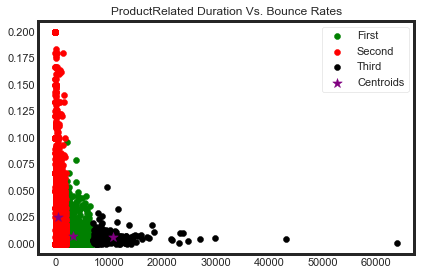

In [59]:
#Clustering
plt.scatter(Z.iloc[pred_z == 0,0],Y.iloc[pred_z == 0,1],label='First',color ='green')
plt.scatter(Z.iloc[pred_z == 1,0],Y.iloc[pred_z == 1,1],label ='Second',color='red')
plt.scatter(Z.iloc[pred_z == 2,0],Y.iloc[pred_z == 2,1],label='Third',color='black')
plt.title('ProductRelated Duration Vs. Bounce Rates', fontsize = 12)
centers = kms.cluster_centers_
plt.scatter(centers[:, 0],centers[:,1],s=100,color='purple',marker='*',label='Centroids')

plt.legend()

In [60]:
# first cluster
print(data[pred_z == 0]['Revenue'].value_counts())
print("The Percentage of first cluster groups who made a transactions is :",round(496/1478*100, 1),"%")

False    1478
True      496
Name: Revenue, dtype: int64
The Percentage of first cluster groups who made a transactions is : 33.6 %


In [61]:
# second cluster
print(data[pred_z == 1]['Revenue'].value_counts())
print("The Percentage of second cluster groups who made a transactions is :",round(1341/8758*100, 1),"%")

False    8758
True     1341
Name: Revenue, dtype: int64
The Percentage of second cluster groups who made a transactions is : 15.3 %


In [62]:
# third cluster
print(data[pred_z == 2]['Revenue'].value_counts())
print("The Percentage of third cluster groups who made a transactions is :",round(71/139*100, 1),"%")

False    139
True      71
Name: Revenue, dtype: int64
The Percentage of third cluster groups who made a transactions is : 51.1 %


According to the clustering graph, second group( cluster with the lowest PageValues and longer Productrelated duration) is the groups of customers who is more interested on purchasing the products

## These are the tables with True Revenue

In [63]:
data_true = data[data['Revenue'] == True][['ExitRates','BounceRates','Administrative_Duration','Informational_Duration','ProductRelated_Duration']]
data_true.describe()

,ExitRates,BounceRates,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,0.019555,0.005117,119.483244,57.611427,1876.209615
std,0.016463,0.012185,201.114732,171.619131,2312.214392
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009521,0.000000,0.000000,0.000000,541.906250
50%,0.016000,0.000000,52.366667,0.000000,1109.906250
75%,0.025000,0.006452,151.083333,19.000000,2266.011310
max,0.200000,0.200000,2086.750000,1767.666667,27009.859430


## These are the tables with False Revenue

In [64]:
data_false = data[data['Revenue'] == False][['ExitRates','BounceRates','Administrative_Duration','Informational_Duration','ProductRelated_Duration']]
data_false.describe()

,ExitRates,BounceRates,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,10375.000000,10375.000000,10375.000000,10375.000000,10375.000000
mean,0.046851,0.024777,74.072235,30.370223,1074.758308
std,0.050577,0.051037,171.333453,134.197135,1806.480766
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015497,0.000000,0.000000,0.000000,154.950000
50%,0.028571,0.004167,0.000000,0.000000,516.476191
75%,0.053333,0.020000,83.700000,0.000000,1336.899838
max,0.200000,0.200000,3398.750000,2549.375000,63973.522230


Based on the Clustering graphs and the tables, it is reasonable to say that the customers who have lower Exit/Bounce Rates with longer stays are more likely to generate profits.

In order to reduese exit/bounce rate we can introduce some benefits for the cousumers or coupon code or loyalty cards, in doing so we can generate more profits. 